# Plot CCF over 20 years

2023.3.25 Kurama Okubo

This notebook plots the result of CCF.

In [1]:
import datetime
import os
import time

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from IPython.display import display, Math

import numpy as np
import pandas as pd
import h5py
import pickle

import matplotlib as mpl

plt.rcParams["font.family"] = 'Arial'
# plt.rcParams["font.sans-serif"] = "DejaVu Sans, Arial, Helvetica, Lucida Grande, Verdana, Geneva, Lucid, Avant Garde, sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 5
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["xtick.minor.size"] = 2
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.visible"] = True


plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.size"] = 5
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["ytick.minor.size"] = 2
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.minor.visible"] = True

In [2]:
output_imgdir = "../figure/ccf_master"
if not os.path.exists(output_imgdir):
    os.makedirs(output_imgdir)
    
# read data
fidir = "../data_npz"

fi_stachanpair = "BP.EADB-BP.LCCB-11"
freqkey = "0.9-1.2"

D = np.load(fidir+f"/corrdata_{fi_stachanpair}_{freqkey}.npz")
for k in D.files:
    print(k)

coda_init_factor
max_coda_length
lags
linstack
t
corr
vel
codainit
codaend


In [3]:
lags = D["lags"]
t = D["t"]
corr = D["corr"]
linstack = D["linstack"]
codainit = D["codainit"]
codaend = D["codaend"]

In [4]:
# convert tvec to datetime
# NOTE: The time is not always start from 0H00M, which occurs due to the lack of hourly CCF when computing daily-stacked CCF.
uniform_tvec = [datetime.datetime.utcfromtimestamp(x) for x in t]


In [5]:
starttime = datetime.datetime(2002, 1, 1)
endtime = datetime.datetime(2022, 6, 1)

# Plot CCF

In [6]:
# np.linspace(-50, 50, 11)

In [7]:
codainit

array([-25.0559602,  25.0559602])

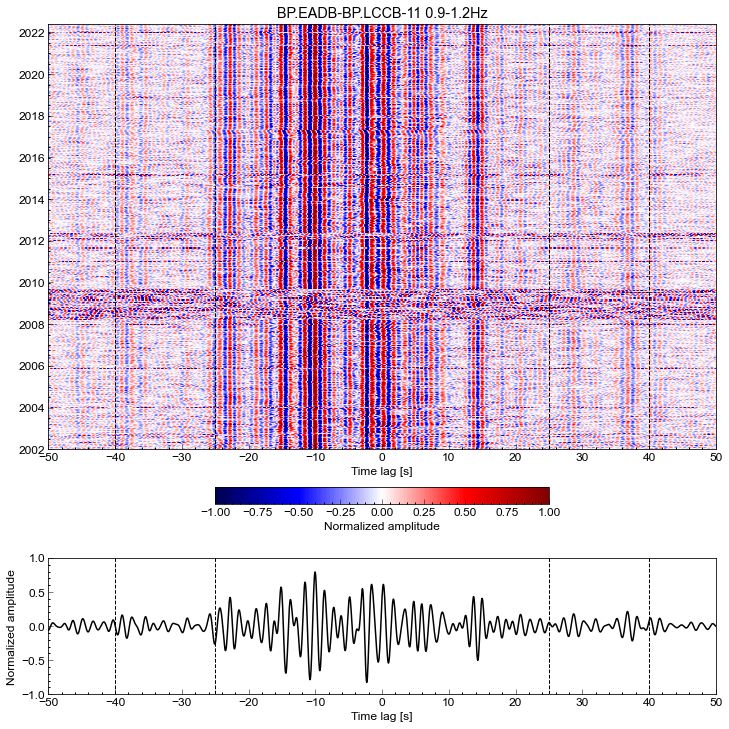

In [8]:
fig, axs = plt.subplots(2, 1 , figsize=(10, 10), sharex=False, gridspec_kw={'height_ratios': [4, 1]})

vmin = -1.0
vmax = 1.0
gcm = "seismic"

axs[0].pcolormesh(lags, uniform_tvec, np.transpose(corr), cmap=gcm, vmin=vmin, vmax=vmax, rasterized=True, )
# axs[0].pcolormesh(uniform_tvec, lags, corr, cmap="viridis", rasterized=True, )


axs[0].set_xlim([-50, 50])
axs[0].set_xticks(np.linspace(-50, 50, 11))
axs[0].set_ylim([starttime, endtime])
figtitle = "{} {}Hz".format(fi_stachanpair, freqkey)
axs[0].set_title(figtitle)

loc = mdates.YearLocator(2)
axs[0].yaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%Y')
axs[0].yaxis.set_major_formatter(fmt)
axs[0].set_xlabel("Time lag [s]")

# coda window
for i in range(2):
    axs[0].axvline(codainit[i], ls="--", c='k', lw=1.0)
    axs[0].axvline(codaend[i], ls="--", c='k', lw=1.0)

# color bar
normalize = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=normalize, cmap=gcm),
             orientation='horizontal', ax=axs[0], pad=0.07, shrink=0.5,
             label="Normalized amplitude")

# cbar.set_ticks([0, 1.0])
axs[1].plot(lags, linstack, "k-")
axs[1].set_xlim([-50, 50])
axs[1].set_ylim([-1., 1.])
axs[1].set_xticks(np.linspace(-50, 50, 11))
axs[1].set_xlabel("Time lag [s]")
axs[1].set_ylabel("Normalized amplitude")


for i in range(2):
    axs[1].axvline(codainit[i], ls="--", c='k', lw=1.0)
    axs[1].axvline(codaend[i], ls="--", c='k', lw=1.0)
    
fig.tight_layout(pad=0.2)
foname = (output_imgdir+"/ccf_master_{}_{}Hz.png".format(fi_stachanpair, freqkey))
plt.savefig(foname, dpi=300)
